In [13]:
import pandas as pd
import shap
import matplotlib.pyplot as plt 
import numpy as np
# 读取player 的数据
player = pd.read_csv("../datafrom200/players.csv")
# x_list = player.columns[7:-5]
# x_list = ['Crossing', 'Finishing', 'Heading_Accuracy', 'Short_Passing', 'Volleys',
#        'Dribbling', 'Curve', 'FK_Accuracy', 'Long_Passing', 'Ball_Control',
#        'Acceleration', 'Sprint_Speed', 'Agility' , 'Balance',
#        'Shot_Power', 'Jumping', 'Stamina', 'Strength', 'Long_Shots',
#        'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
#        'Composure', 'Defensive_Awareness']
x_list = ['Finishing', 'Short_Passing', 'Dribbling', 'Long_Passing',
       'Ball_Control', 'Acceleration', 'Sprint_Speed', 
       'Reactions', 
       'Balance',
       'Shot_Power', 'Stamina', 'Strength', 'Aggression', 'Vision',
       'Penalties', 'Standing_Tackle', 'Sliding_Tackle'] 
X = player[x_list]
y = player["value"]



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



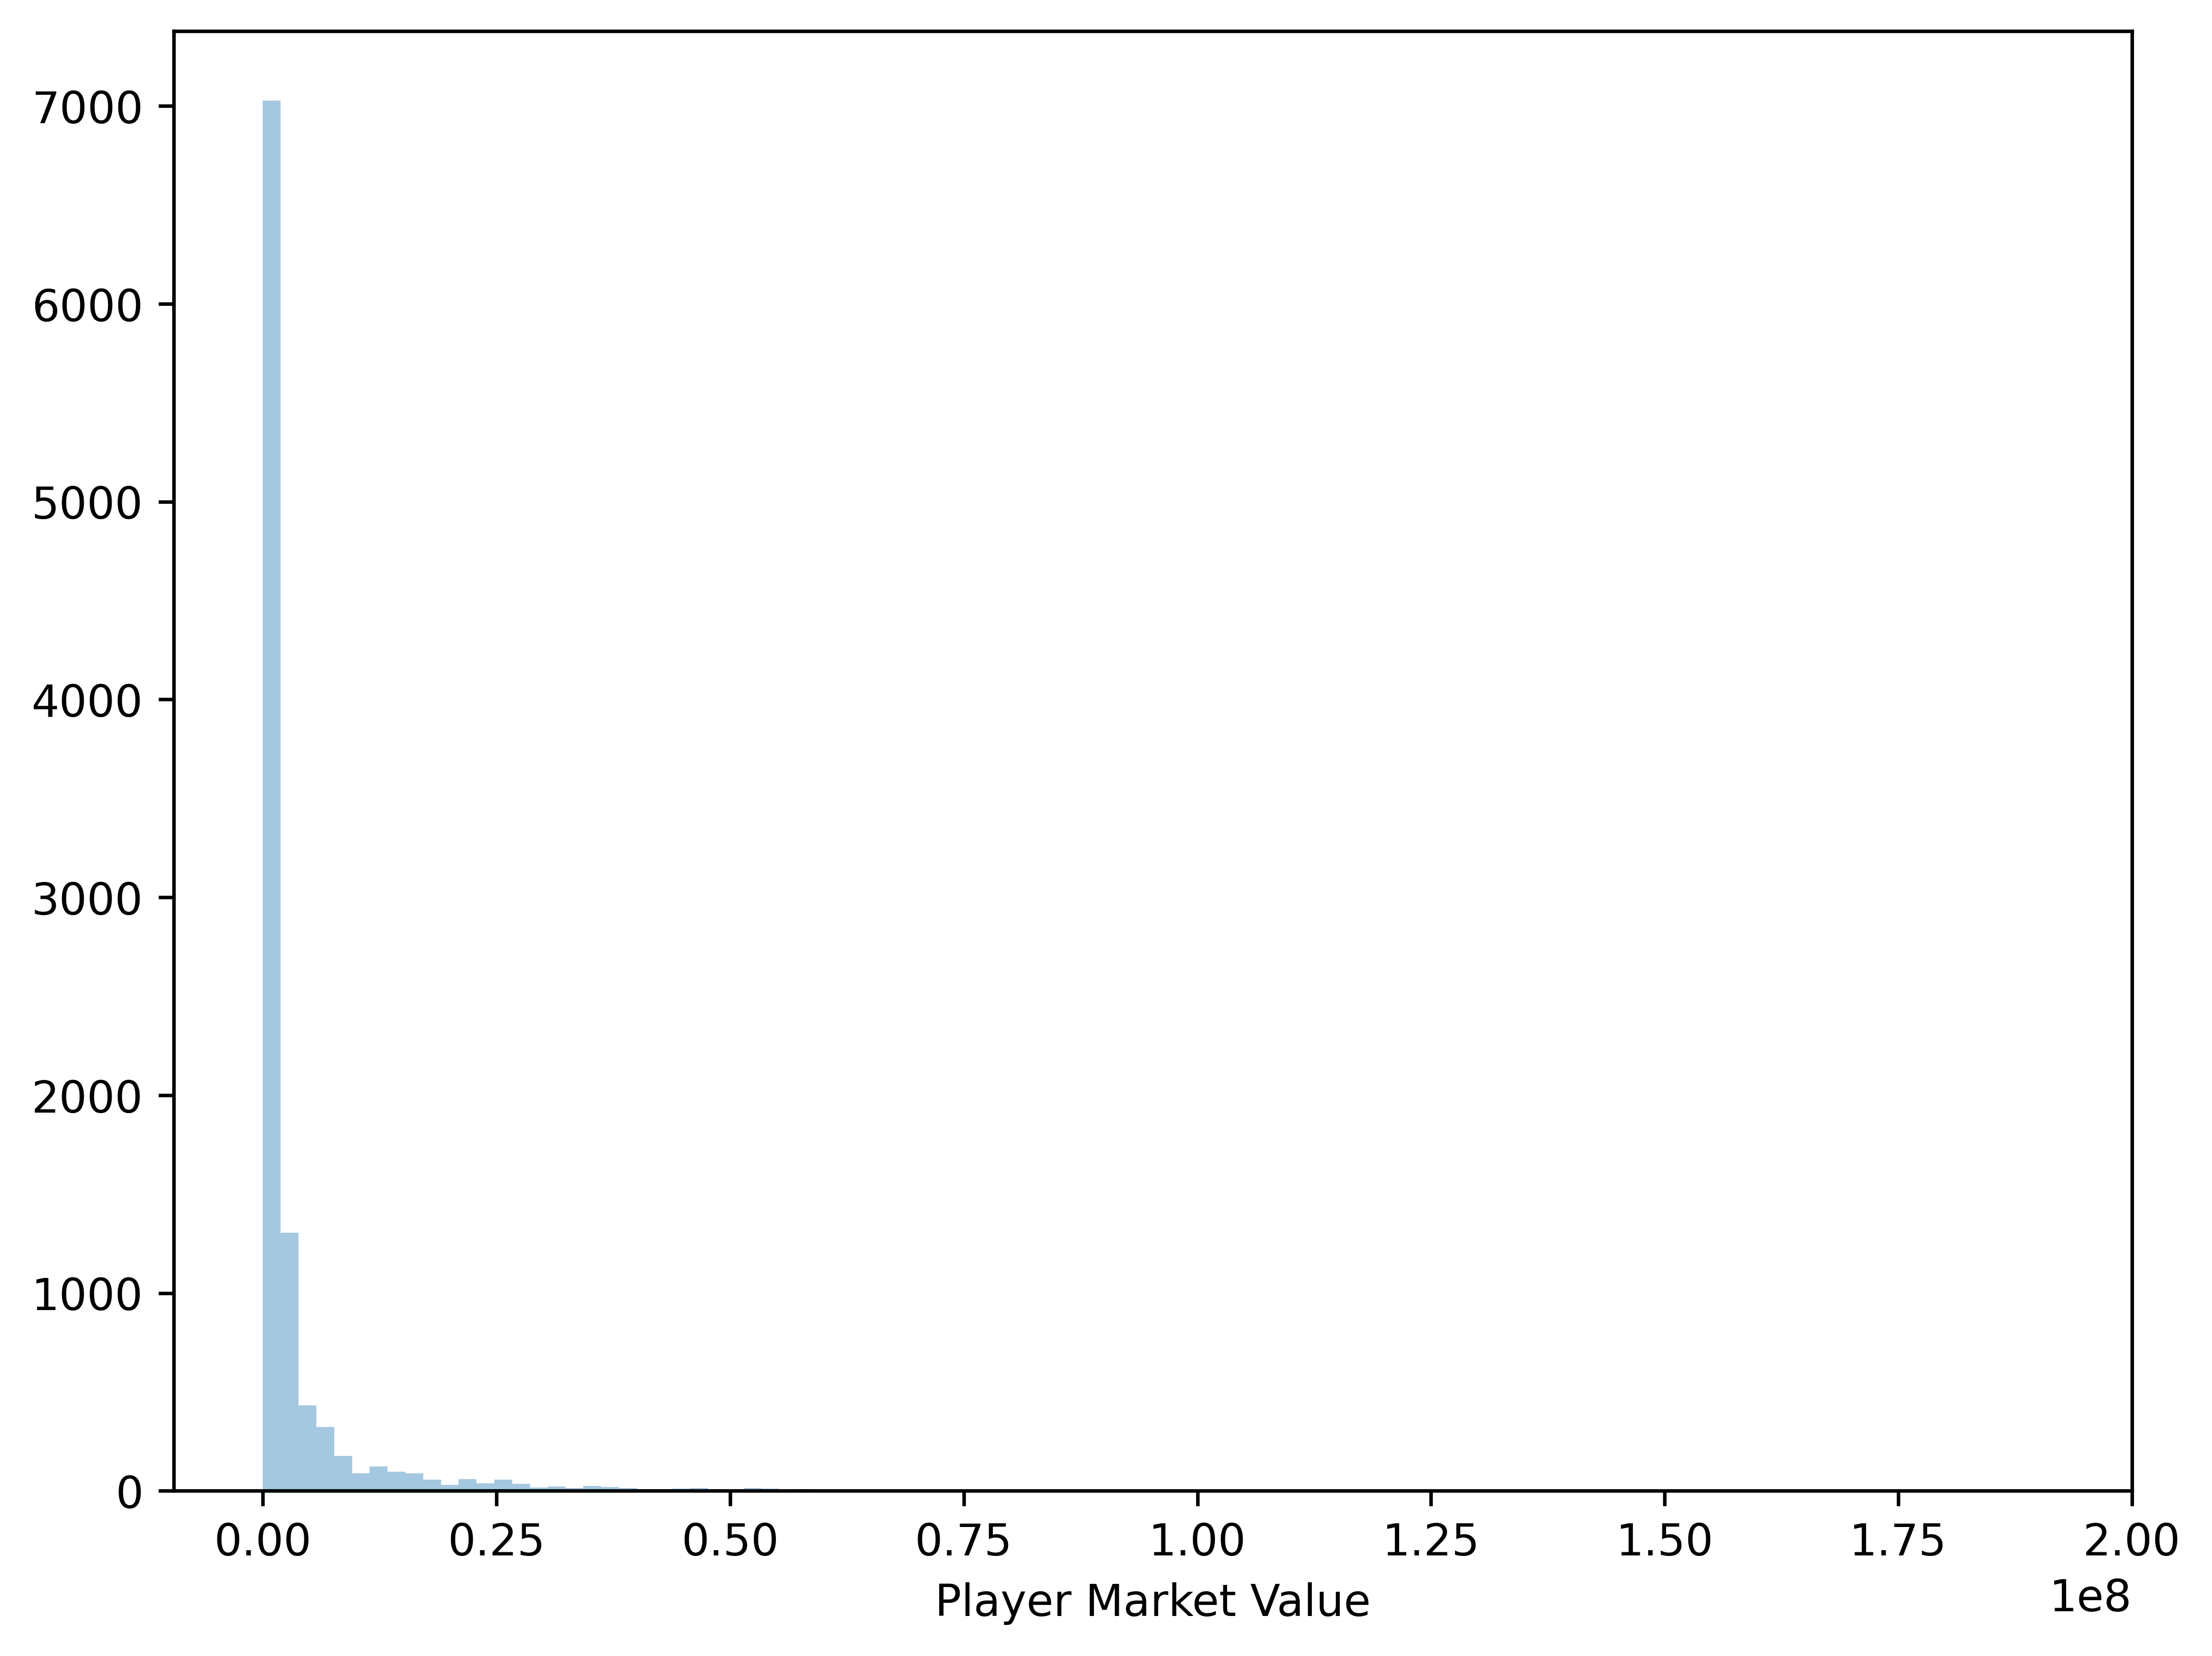

In [14]:
# Plot the transformed data 
# use sns
# set dpi to 300
import seaborn as sns


plt.figure(figsize=(8, 6), dpi=600)
sns.distplot(y, bins=100, kde=False)
# sns.distplot(y,bins=100)
plt.xlabel("Player Market Value")
# plt.savefig("/mnt/d/桌面/英文文章标准档案/4. Figure/final_version/original_data_line.pdf", format='pdf')
plt.savefig("/mnt/d/桌面/英文文章标准档案/4_Figure/final_version/original_without_data_line.pdf", format='pdf')


In [15]:
boundry = 0.25*10**8
X = X[y < boundry]
y = y[y < boundry]
len(X)

9842



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



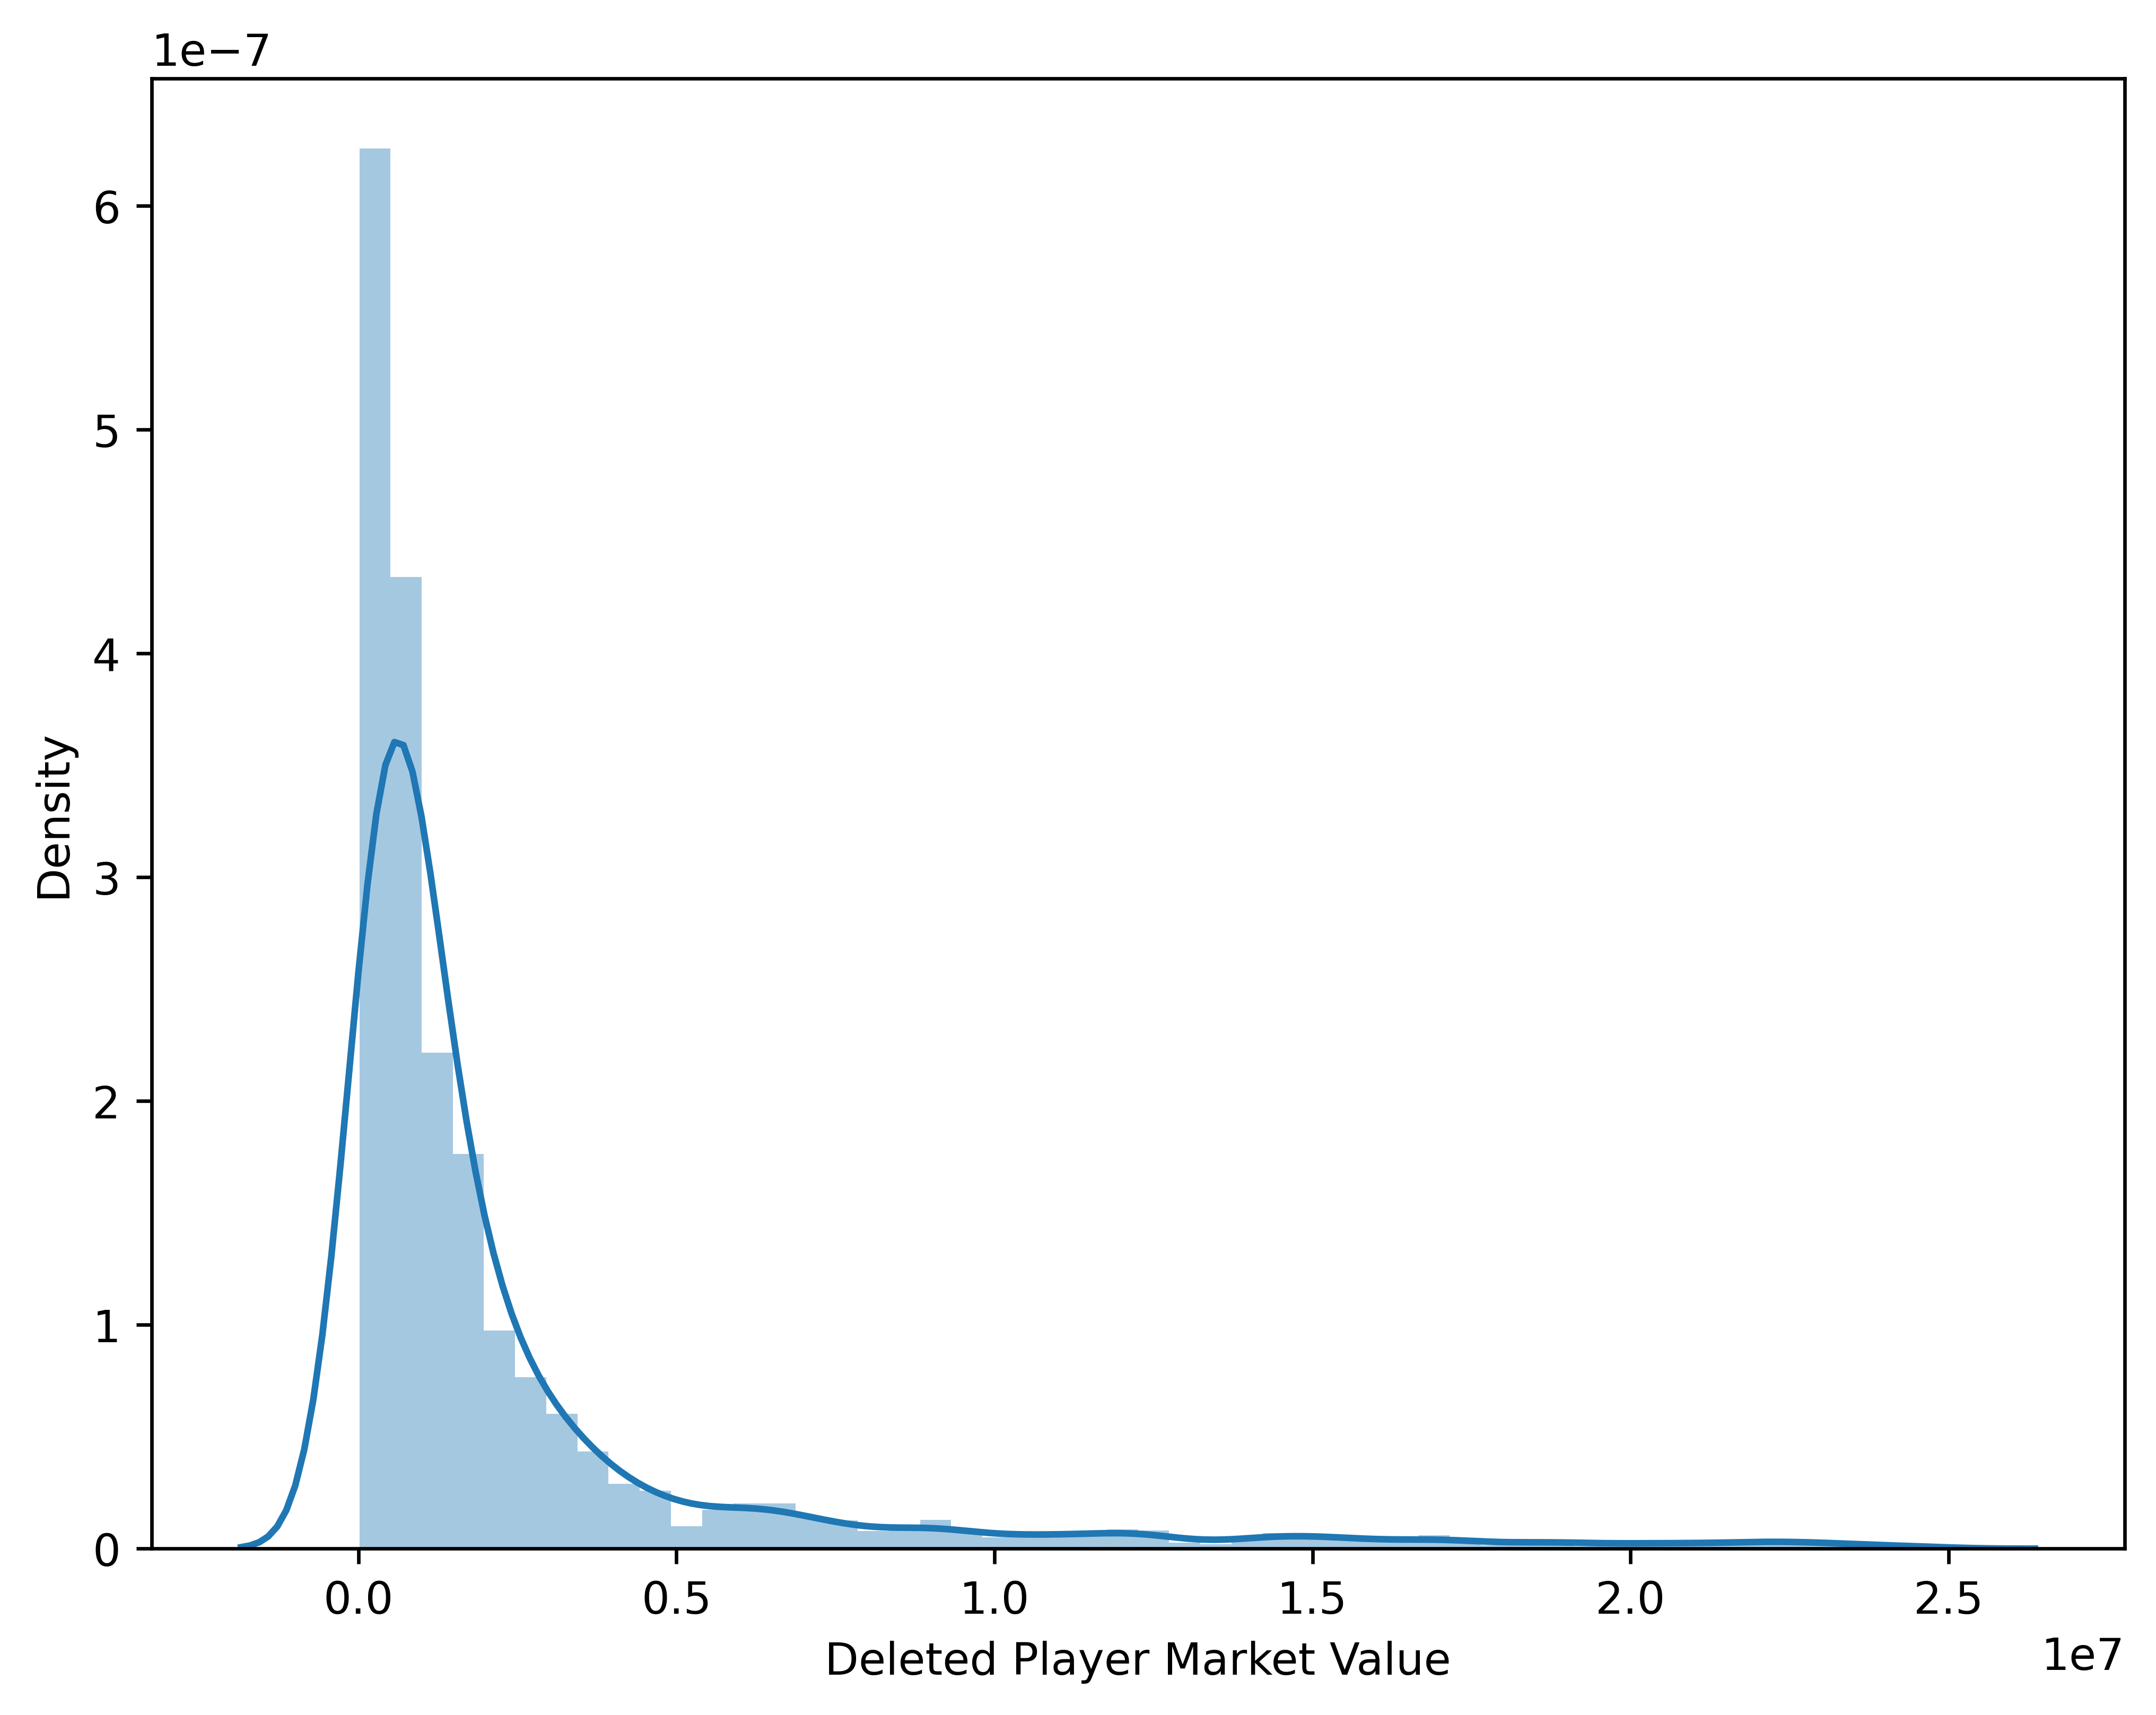

In [22]:
plt.figure(figsize=(8, 6), dpi=600)
# sns.distplot(y, kde=False)
sns.distplot(y)
plt.xlabel("Deleted Player Market Value")
plt.savefig("/mnt/d/桌面/英文文章标准档案/4_Figure/final_version/deleted_data_line.pdf")
# plt.savefig("/mnt/d/桌面/英文文章标准档案/4_Figure/final_version/deleted_without_data_line.pdf", format='pdf')

Transformed data: [7.85664747 7.78820172 7.41020359 ... 7.48835538 7.75393443 7.84449768]
Lambda value: -0.09565905050311828




`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



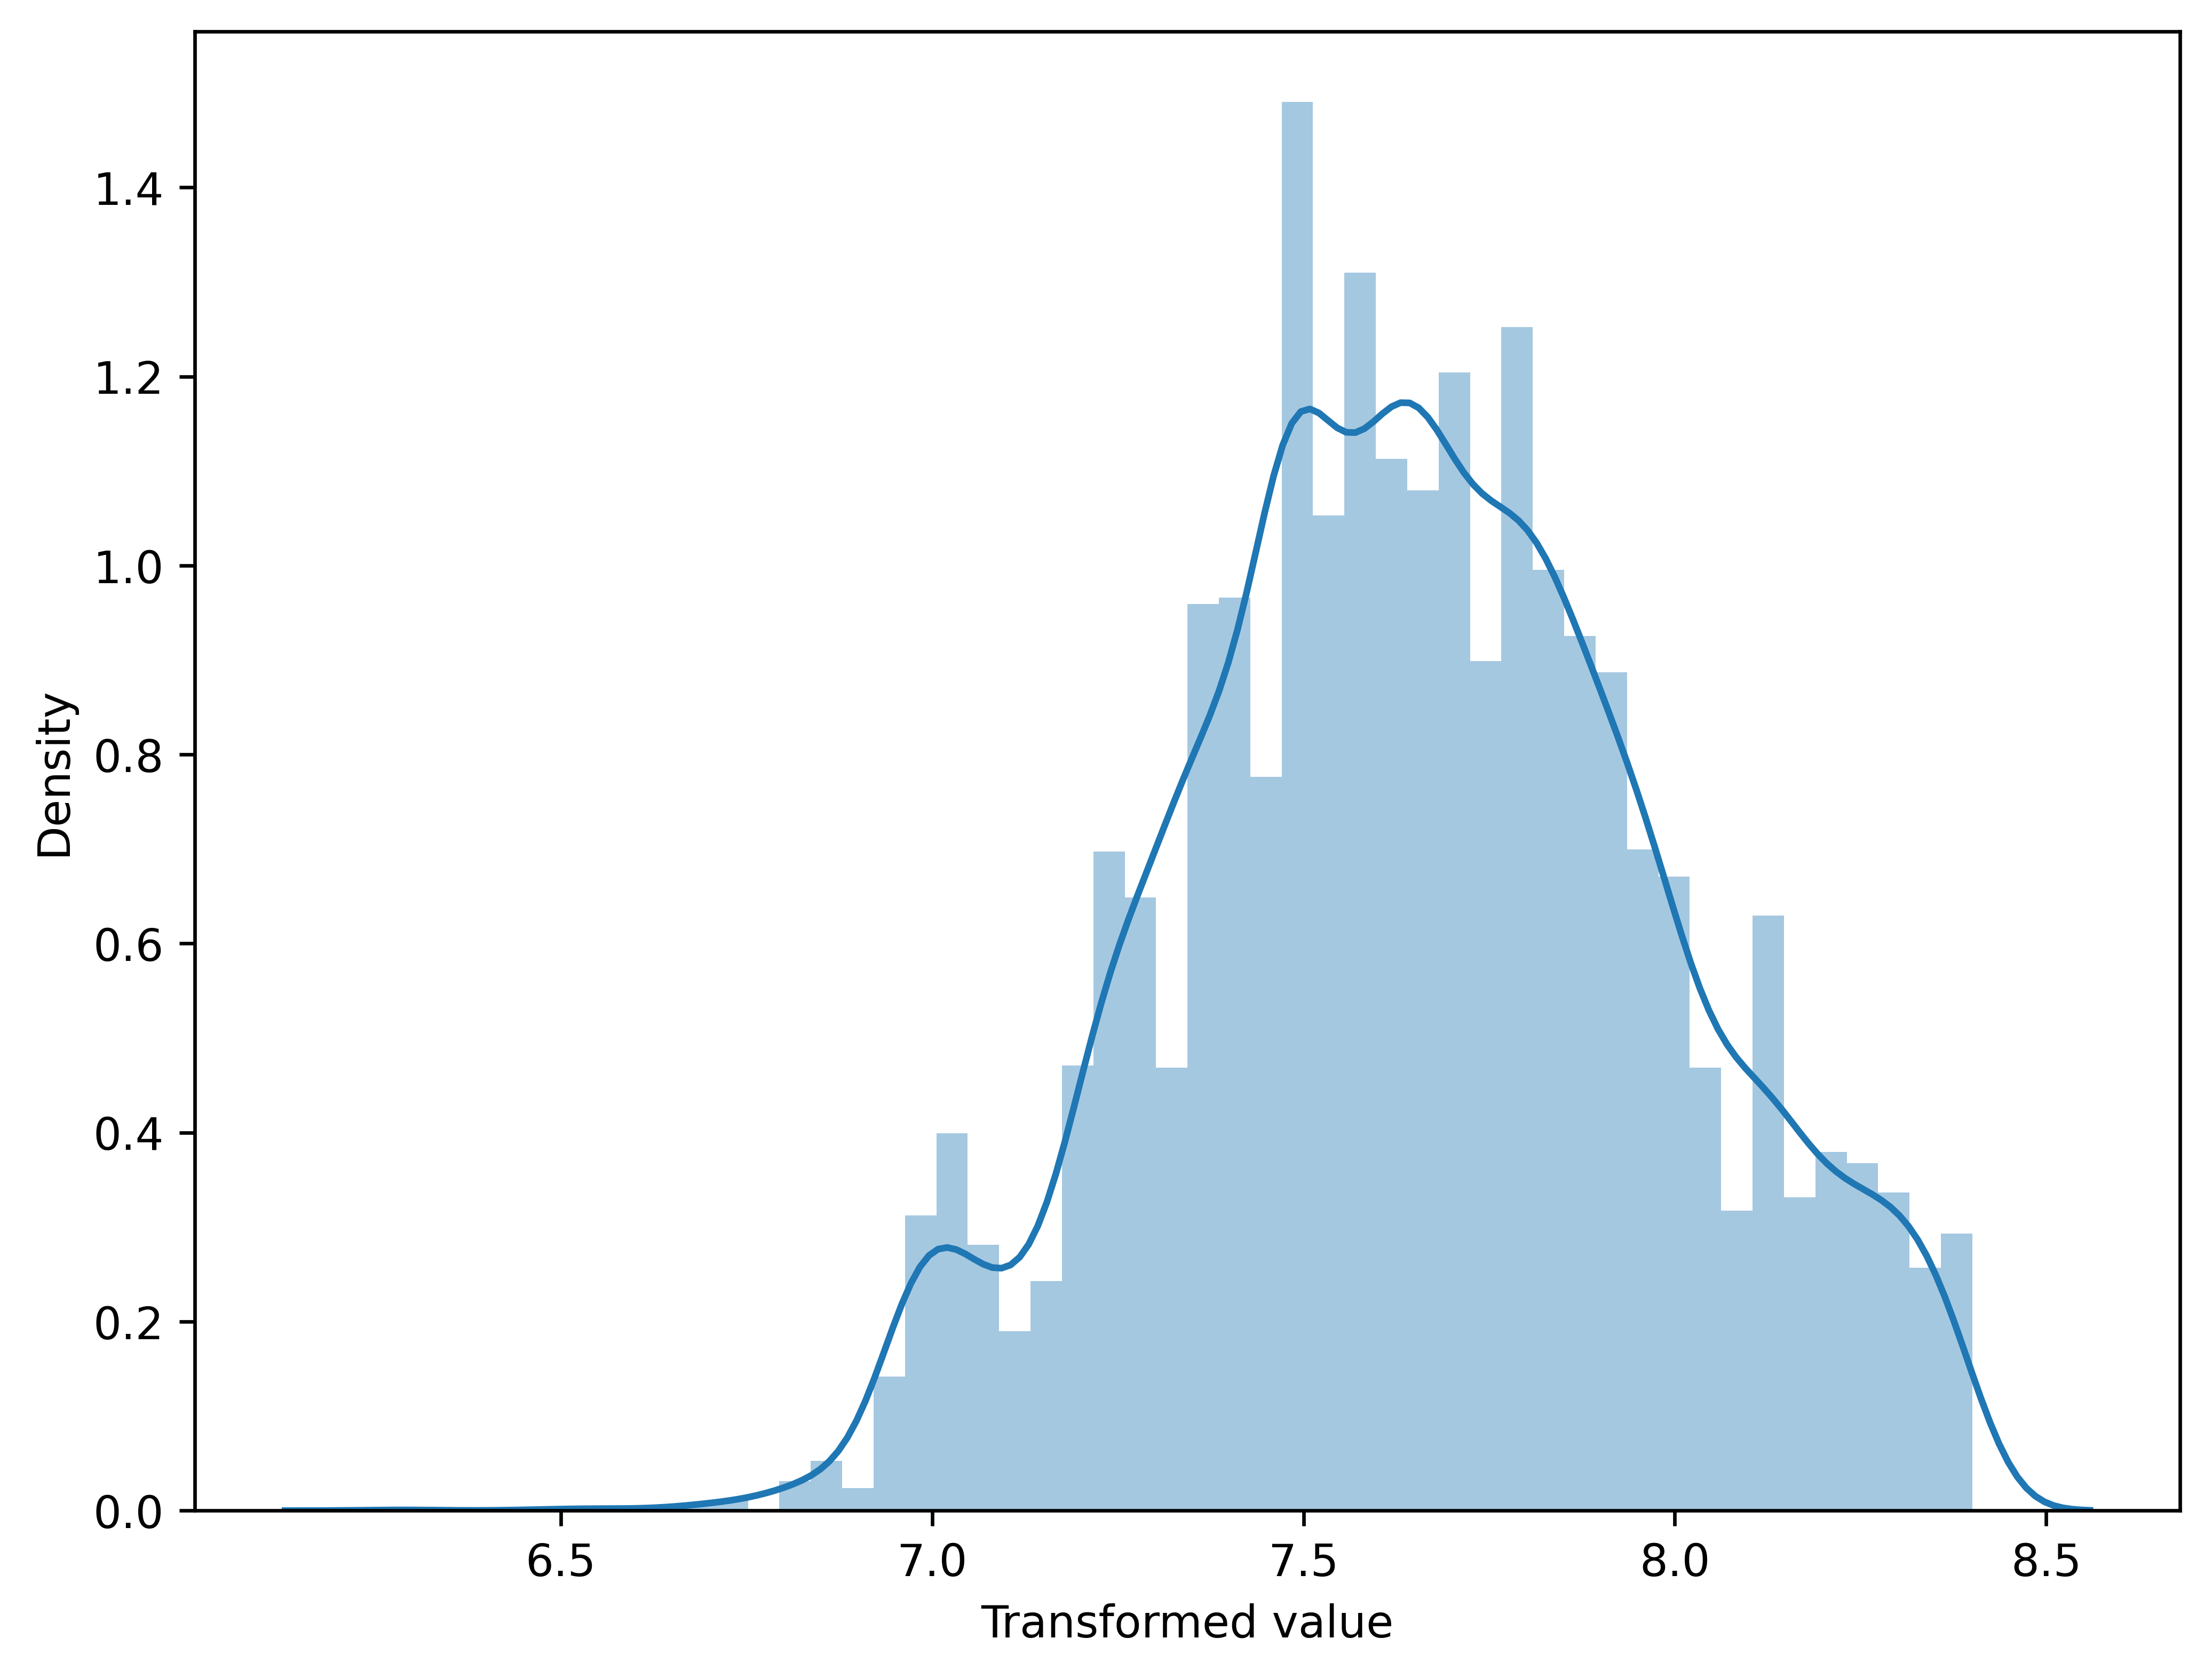

In [5]:
from scipy import stats


# Apply Box-Cox transformation
transformed_data, lambda_value = stats.boxcox(y)

print("Transformed data:", transformed_data)
print("Lambda value:", lambda_value)

# Plot the transformed data 
# use sns
# set dpi to 300
import seaborn as sns


plt.figure(figsize=(8, 6), dpi=600)
# sns.distplot(transformed_data, kde=False)
sns.distplot(transformed_data)
plt.xlabel("Transformed value")
plt.savefig("/mnt/d/桌面/英文文章标准档案/4_Figure/final_version/transformed_data_line.pdf", format='pdf')


In [6]:
y = transformed_data

In [7]:
from sklearn.model_selection import train_test_split
# 划分训练集 train, test : 0.8, 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


model_gbdt = GradientBoostingRegressor(n_estimators=800, learning_rate=0.1, max_depth=5)
model_gbdt.fit(X_train, y_train)

print(model_gbdt.score(X_train, y_train))
print(model_gbdt.score(X_test, y_test))

0.9895577806038576
0.914116075095815


In [10]:
explainer_gbdt = shap.TreeExplainer(model_gbdt)
shap_values_gbdt = explainer_gbdt.shap_values(X)

In [ ]:
model_gbdt.feature_importances_

array([0.01790942, 0.06845592, 0.02612569, 0.00476533, 0.22731134,
       0.01227545, 0.03797499, 0.46317524, 0.00533426, 0.00697265,
       0.0146738 , 0.01104058, 0.0053998 , 0.00589599, 0.00615814,
       0.05823054, 0.02830086])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


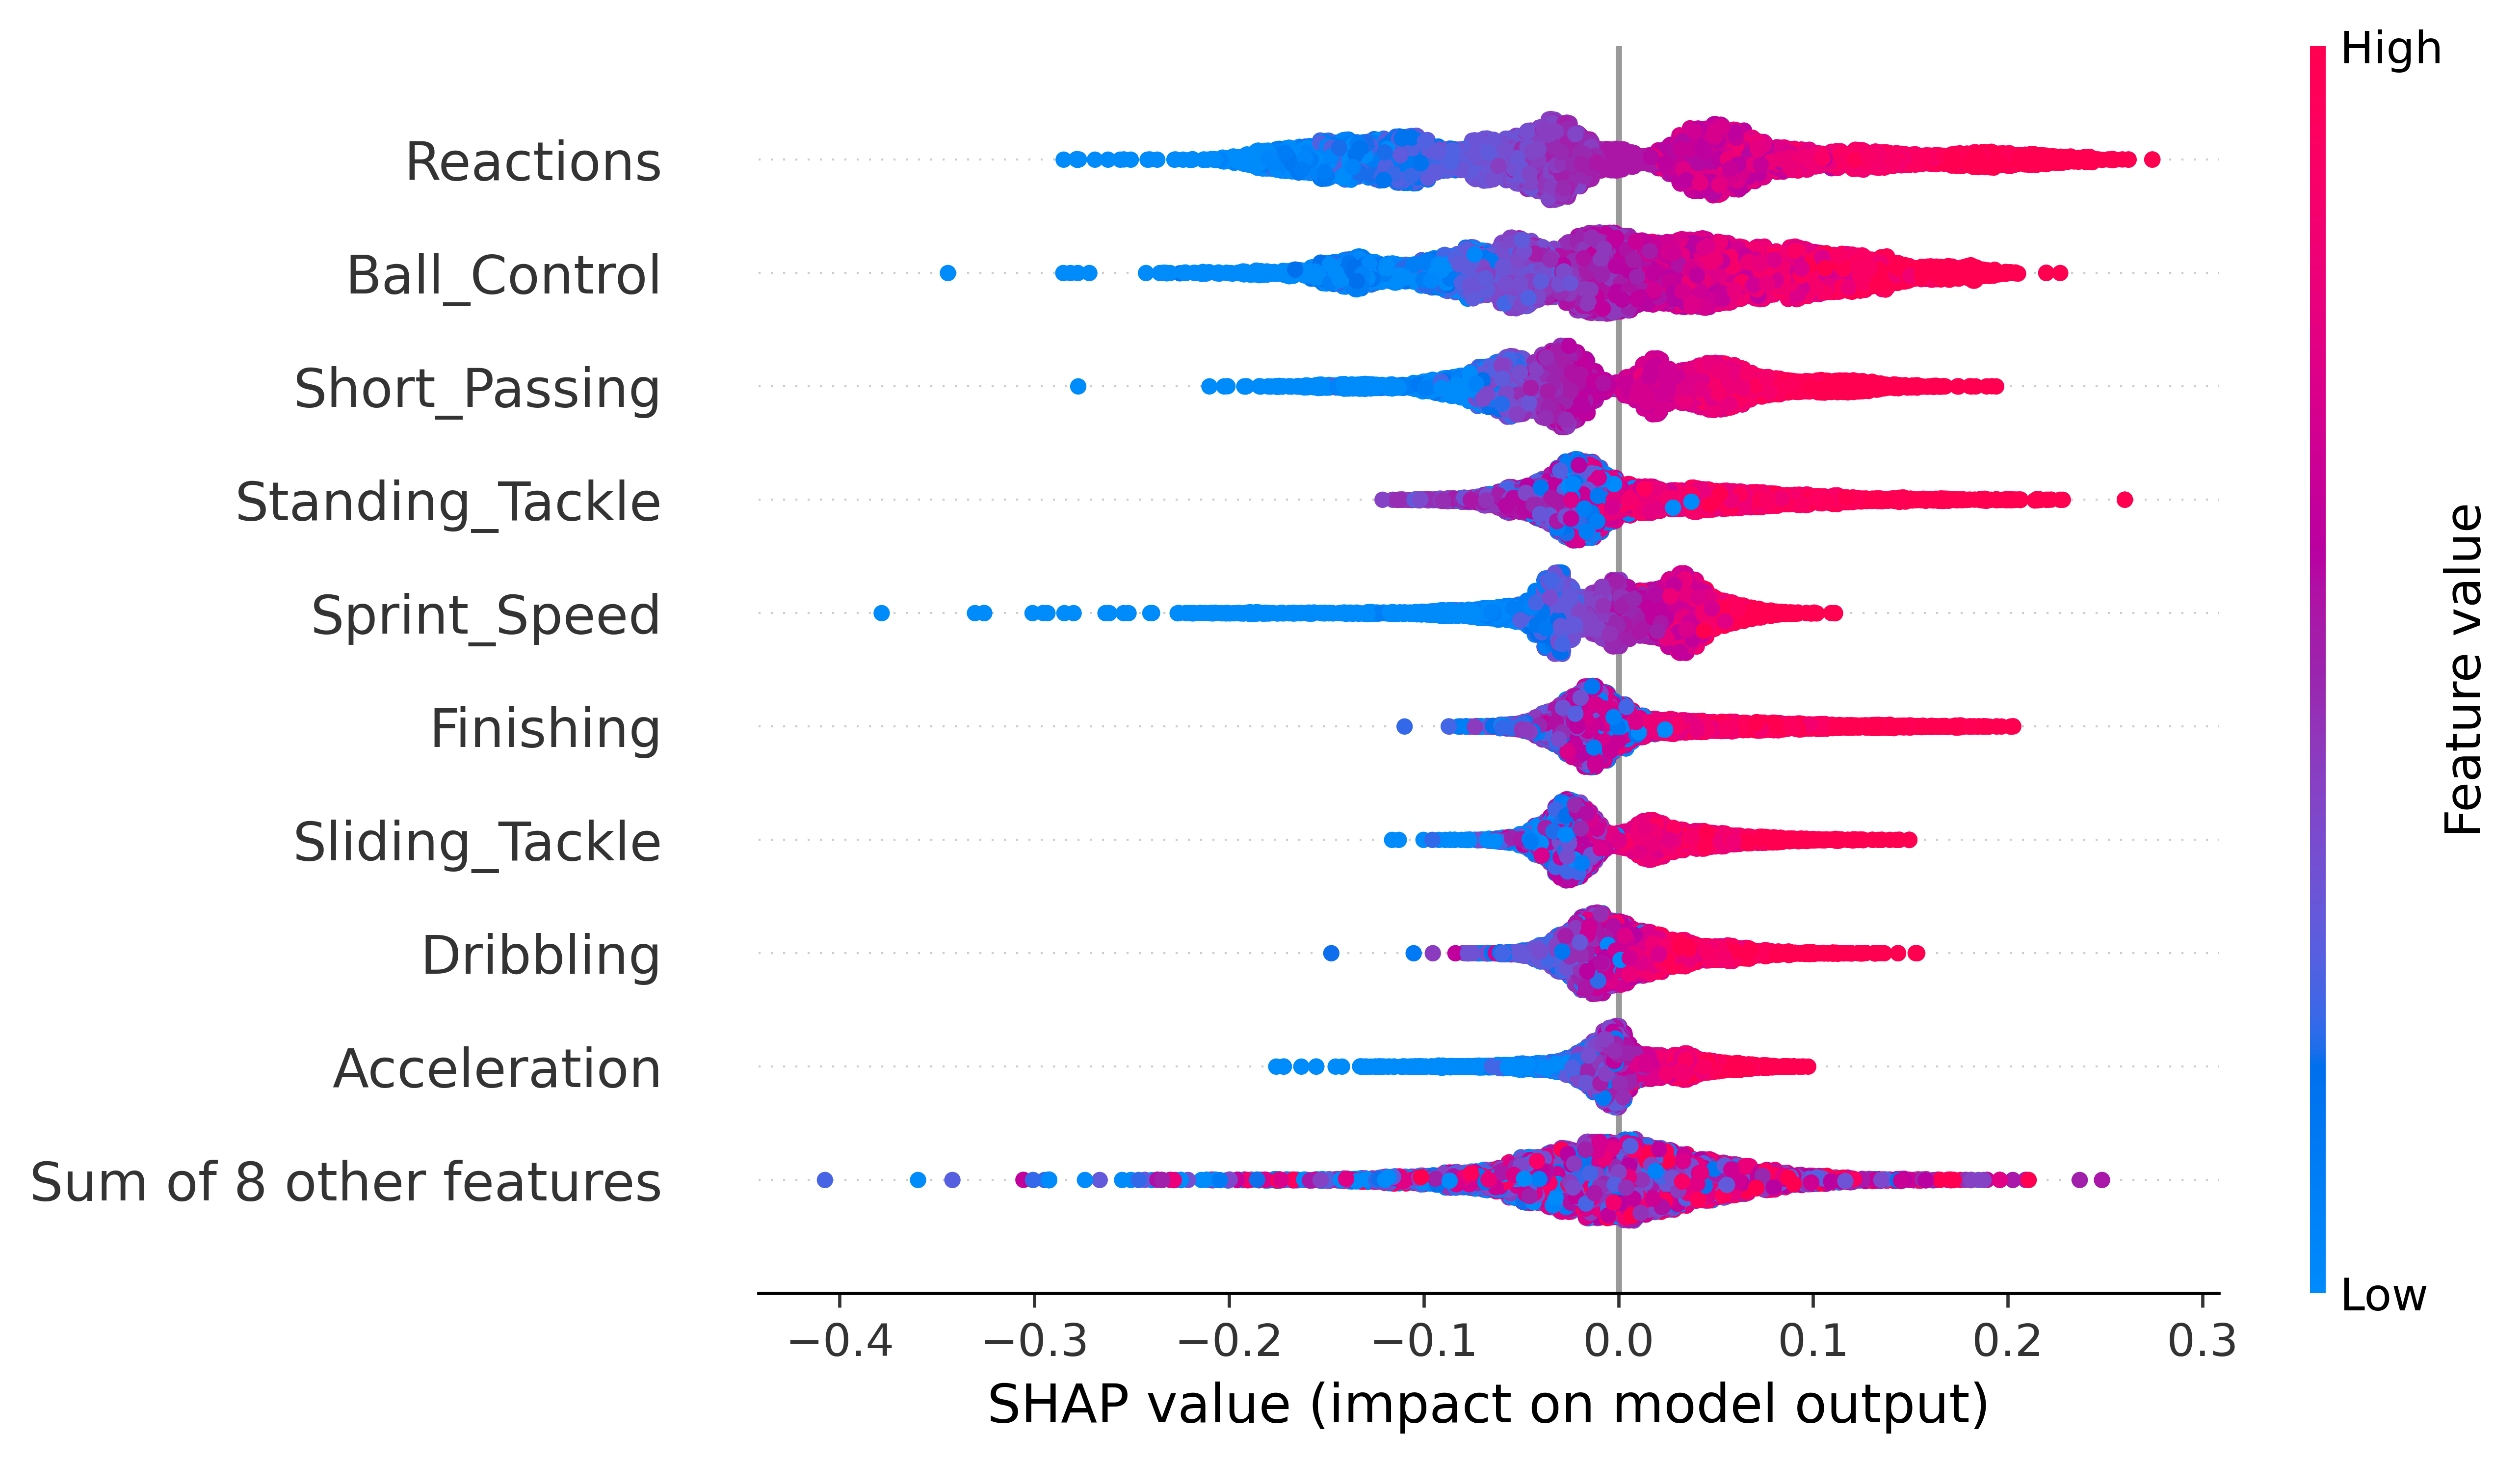

In [20]:
shap.initjs()
# fig, ax = shap.partial_dependence_plot(reg.predict, X_test)
# fig = plt.figure(1)
# shap.summary_plot(shap_values_gbdt, X, plot_type="bar")
# fig.savefig("../result/shapvalue_global/gbdt_sumbar_boxcox.tiff")
# fig.savefig("../result/shapvalue_global/gbdt_sumbar.pes")
fig = plt.figure(dpi=600)
shap.plots.beeswarm(explainer_gbdt(X))
fig.tight_layout()
# fig.savefig("../result/shapvalue_global/gbdt_beeswarm_boxcox_less0.25.tiff")
# fig.savefig("../result/shapvalue_global/gbdt_beeswarm_boxcox_less0.5.pdf")
fig.savefig("/mnt/d/桌面/英文文章标准档案/4_Figure/final_version/beeswarm_boxcox_less0.25.pdf")
# fig.savefig("../result/shapvalue_global/gbdt_beeswarm.pes")
# fig = plt.figure()
# shap.plots.bar(explainer_gbdt(X))
# fig.tight_layout()
# fig.savefig("../result/shapvalue_global/gbdt_bar_boxcox.tiff")
# fig.savefig("../result/shapvalue_global/gbdt_bar.pes")

In [ ]:
# # Catboost
# import catboost
# cbt = catboost.CatBoostRegressor()
# cbt.fit(X_train, y_train)
# print(cbt.score(X_validation, y_validation))

# explainer_cbt = shap.TreeExplainer(cbt)
# shap_values_cbt = explainer_cbt.shap_values(X)

# fig = plt.figure(1)
# shap.summary_plot(shap_values_cbt, X, plot_type="bar")
# fig.savefig("../result/shapvalue_global/cbt_sumbar.pdf")
# fig = plt.figure()
# shap.plots.beeswarm(shap_values_cbt)
# fig.tight_layout()
# fig.savefig("../result/shapvalue_global/cbt_beeswarm.pdf")
# fig = plt.figure()
# shap.plots.bar(shap_values_cbt)
# fig.tight_layout()
# fig.savefig("../result/shapvalue_global/cbt_bar.pdf")

In [ ]:
# # XGBoost
# import xgboost as xgb
# n, depth = 60, 20
# bst = xgb.XGBRFRegressor(n_estimators=n, max_depth=depth)
# bst.fit(X_train, y_train)
# explainer_xgb = shap.TreeExplainer(bst)
# shap_values_xgb = explainer_xgb(X)

In [ ]:
# fig = plt.figure(1)
# shap.summary_plot(shap_values_xgb, X, plot_type="bar")
# fig.savefig("../result/shapvalue_global/xbt_sumbar.pdf")

In [ ]:
# for i, name_col in enumerate(X.columns):
#     shap.dependence_plot(ind=name_col, shap_values=shap_values_xgb.values, feature_names=shap_values_xgb.feature_names, features=shap_values_xgb.data, show=False)
#     plt.savefig("../result/dependence_plot/xgb_{name}.png".format(name=name_col))

In [ ]:
for i, name_col in enumerate(X.columns):
    plt.figure(dpi=600)
    shap.dependence_plot(i, shap_values_gbdt, X, show=False)
    # plt.show()
    # plt.savefig("../result/dependence_plot/gbdt_{name}.pdf".format(name=name_col))
    plt.savefig("/mnt/d/桌面/英文文章标准档案/4_Figure/final_version/dependent_plot/gbdt_{name}.pdf".format(name=name_col))
